<a href="https://colab.research.google.com/github/asddzxcc1856/2024-colab/blob/main/%E8%82%BA%E7%82%8E%E9%A0%90%E6%B8%ACCNN%E6%8D%B2%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_width, img_height = 256, 256
batchsize = 32
train = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))
validation = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))
test = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5222 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [ ]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5222, 256, 256, 3)
Shape of 'y_train': (5222, 2)
Shape of 'x_val': (16, 256, 256, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [ ]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train=x_train/256
x_val=x_val/256
x_test=x_test/256

# 5222張圖片 training dataset


---


# 16張圖片 validation dataset

---


# 623張圖片 test dataset

In [ ]:
class chest_net(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.conv1 = tf.keras.layers.Conv2D(filters=32,kernel_size=8,strides=(1,1),padding='same',kernel_initializer='he_normal' ,bias_initializer='zeros',input_shape=(1,256,256,3))
    self.activate1 = tf.keras.layers.ReLU()
    self.pool1 = tf.keras.layers.MaxPool2D()
    self.conv2 = tf.keras.layers.Conv2D(filters=32,kernel_size=8,strides=(1,1),padding='same',kernel_initializer='he_normal' ,bias_initializer='zeros')
    self.activate2 = tf.keras.layers.ReLU()
    self.pool2 = tf.keras.layers.MaxPool2D()
    self.conv3 = tf.keras.layers.Conv2D(filters=32,kernel_size=8,strides=(1,1),padding='same',kernel_initializer='he_normal' ,bias_initializer='zeros')
    self.activate3 = tf.keras.layers.ReLU()
    self.pool3 = tf.keras.layers.MaxPool2D()
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(1024)
    self.dense2 = tf.keras.layers.Dense(2)
  def call(self,inputs):
    x = self.conv1(inputs)
    x = self.activate1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.activate2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.activate3(x)
    x = self.pool3(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = tf.nn.softmax(x)
    return x

In [ ]:
net = chest_net()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
x=tf.random.normal([32, 256, 256, 3], dtype=tf.float32)
print(x.shape)
y = net.predict(x)
print(y)

(32, 256, 256, 3)
1/1 [==============================] - 0s 454ms/step
[[0.23209114 0.76790875]
 [0.02456875 0.9754312 ]
 [0.29761758 0.70238245]
 [0.32754487 0.67245513]
 [0.01204551 0.98795444]
 [0.00822666 0.9917732 ]
 [0.06556547 0.9344346 ]
 [0.86732477 0.13267528]
 [0.07510898 0.924891  ]
 [0.18789344 0.81210655]
 [0.26666984 0.73333013]
 [0.04047104 0.9595289 ]
 [0.01416515 0.9858349 ]
 [0.74115556 0.2588444 ]
 [0.0730883  0.9269117 ]
 [0.7323288  0.2676711 ]
 [0.37068808 0.6293119 ]
 [0.16643934 0.83356065]
 [0.03814823 0.9618517 ]
 [0.0709539  0.9290461 ]
 [0.3542263  0.64577365]
 [0.20659962 0.7934004 ]
 [0.01246466 0.98753524]
 [0.04068231 0.9593177 ]
 [0.07842306 0.9215769 ]
 [0.25840554 0.7415945 ]
 [0.07382461 0.9261753 ]
 [0.3842532  0.6157468 ]
 [0.00264872 0.9973513 ]
 [0.04634102 0.953659  ]
 [0.01036866 0.98963135]
 [0.01440267 0.98559725]]


In [ ]:
epochs = 1
for t in range(epochs):
  for i in range(len(x_train)//32):
    with tf.GradientTape() as tape:
      #y_pred 是預測的每一類別的機率值
      y_pred = tf.reshape(net(tf.reshape(x_train[i:i+32],(32,256,256,3)), training=True),(32,2)) # shape(1,2)
      #取loss function會取預測值中最大值，也就是機率值最大的
      loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=tf.argmax(y_train[i:i+32],axis=1), y_pred=y_pred) #y_train: shape(5222,1) y_train[i]: shape(1) y_pred: shape(1,2)
      #loss 取平均值可以得到一個純量
      loss = tf.reduce_mean(loss)
      print("loss %f" % loss.numpy())
    #backward propagation
    grads = tape.gradient(loss, net.trainable_variables)
    #透過前面的偏微分dL/dW更新參數值，選用前面指定的adam optimizer
    optimizer.apply_gradients(grads_and_vars=zip(grads, net.trainable_variables))
    print(y_pred)

串流輸出內容已截斷至最後 5000 行。
 [0.33381253 0.6661874 ]
 [0.50322783 0.4967722 ]], shape=(32, 2), dtype=float32)
loss 0.318356
tf.Tensor(
[[0.28324115 0.7167588 ]
 [0.07318571 0.92681426]
 [0.6900036  0.30999634]
 [0.07839774 0.9216022 ]
 [0.6446172  0.3553827 ]
 [0.0864502  0.9135498 ]
 [0.6839805  0.31601956]
 [0.78741544 0.21258456]
 [0.08643124 0.91356874]
 [0.0570958  0.9429041 ]
 [0.07200184 0.9279981 ]
 [0.03026687 0.96973306]
 [0.10963355 0.8903664 ]
 [0.12055519 0.8794448 ]
 [0.14056267 0.85943735]
 [0.09519532 0.9048047 ]
 [0.31055236 0.68944764]
 [0.5719272  0.42807278]
 [0.06176814 0.93823177]
 [0.08241596 0.917584  ]
 [0.05564121 0.9443588 ]
 [0.40290576 0.59709424]
 [0.14017922 0.8598208 ]
 [0.06081518 0.9391848 ]
 [0.2703483  0.7296516 ]
 [0.3743864  0.62561363]
 [0.19636033 0.80363965]
 [0.3612302  0.6387698 ]
 [0.25162435 0.7483757 ]
 [0.2040972  0.7959027 ]
 [0.31007478 0.6899253 ]
 [0.15881848 0.8411814 ]], shape=(32, 2), dtype=float32)
loss 0.348335
tf.Tensor(
[[0.04025429 0.

In [ ]:
from sklearn.metrics import accuracy_score
#y_pred 是預測的每一類別的機率值
y_pred = net.predict(x_test) # shape(1,2)
score = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))
print(score)

20/20 [==============================] - 2s 100ms/step
0.7564102564102564


In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-17 11:40:14--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.112.100, 108.177.112.113, 108.177.112.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.112.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-17 11:40:14--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.119.132, 2607:f8b0:4001:c23::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.119.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-05-17 

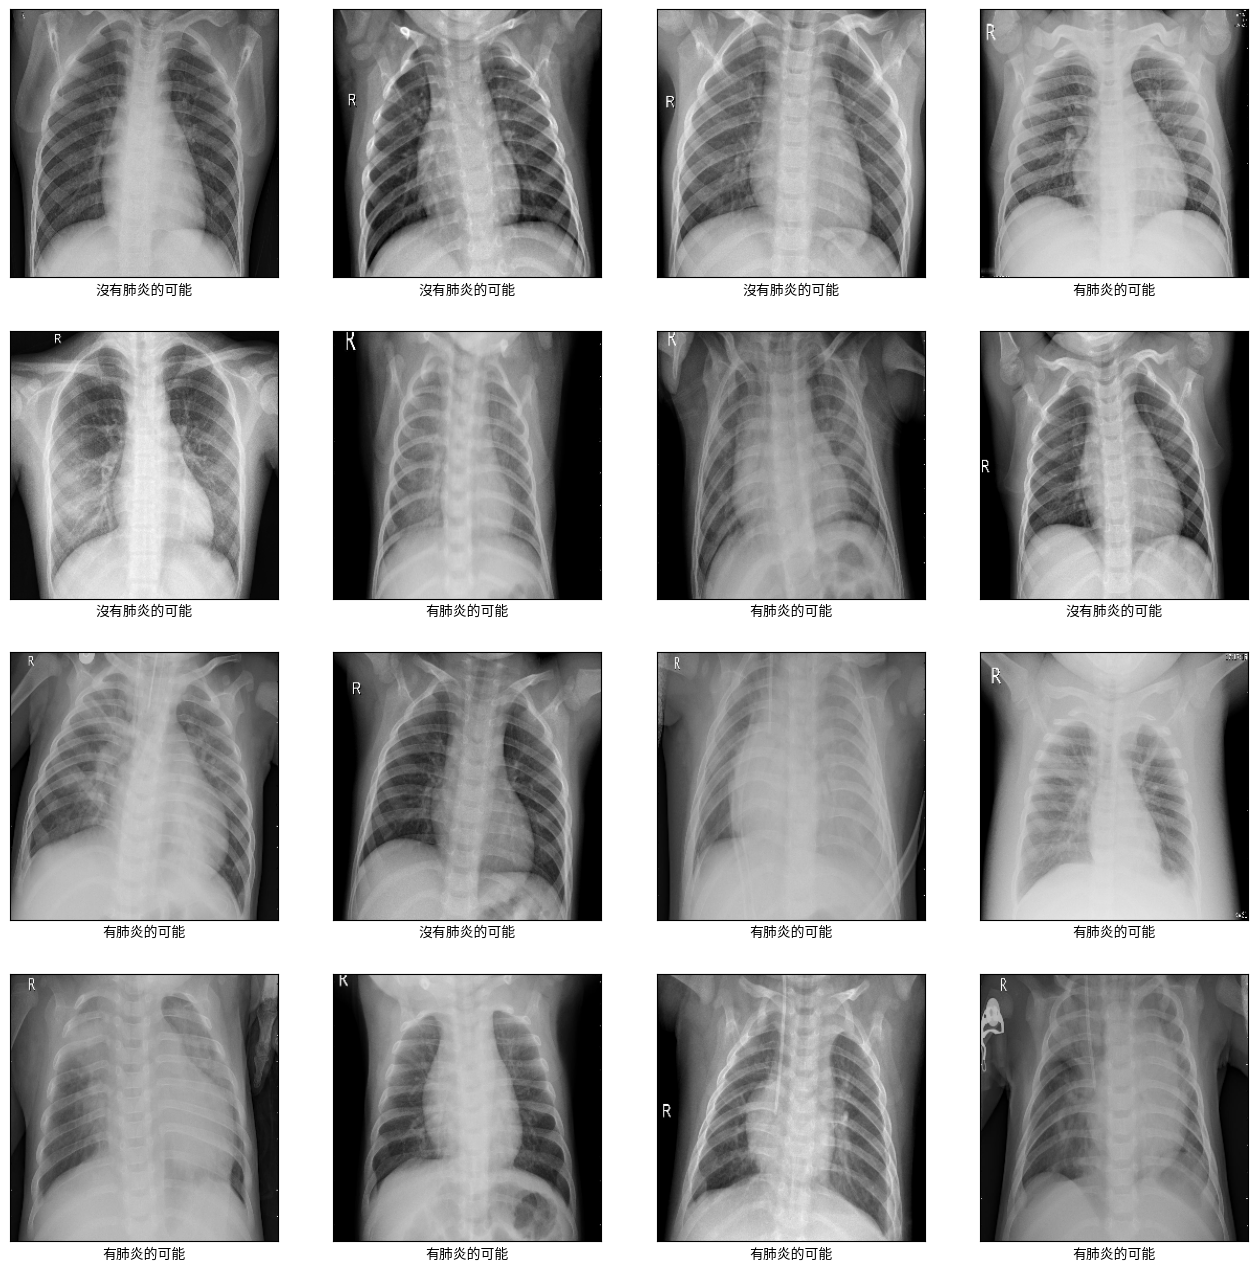

In [ ]:
# 显示每个类别的第一张图片
plt.figure(figsize=(16,16))
idx = ['沒有肺炎的可能','有肺炎的可能']
for i in range(len(x_test[:16])):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel(idx[np.argmax(y_test[i])])
plt.show()